In [8]:
# подгружаем необходимые библиотеки
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [25]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline

In [3]:
data = pd.read_csv('glass.csv')

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Type'),
                                                    data['Type'],
                                                    test_size=0.2,
                                                    random_state=42)

In [9]:
dt = RandomForestClassifier()
dt.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
dt.score(X_train, y_train)

1.0

In [12]:
dt.score(X_test, y_test)

0.8604651162790697

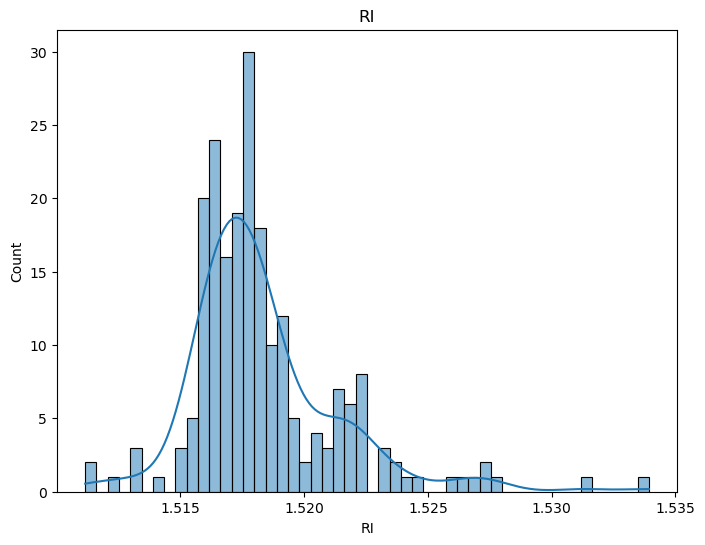

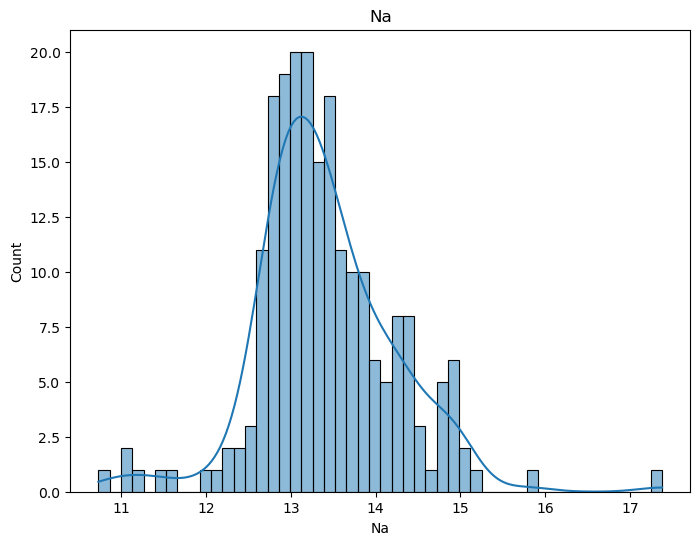

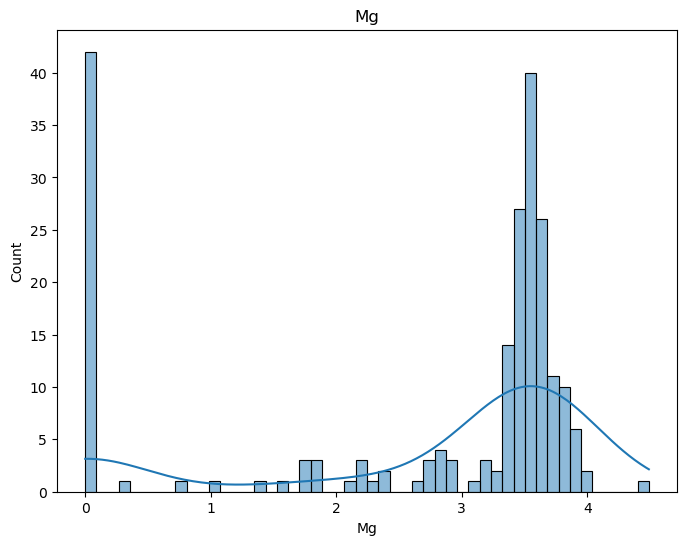

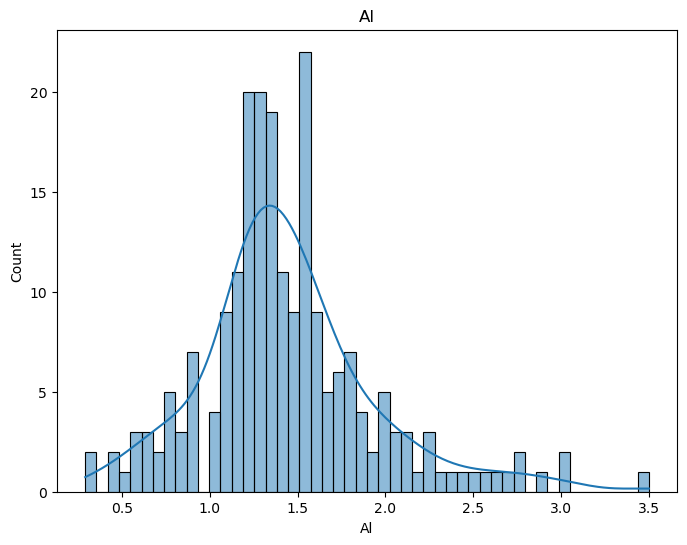

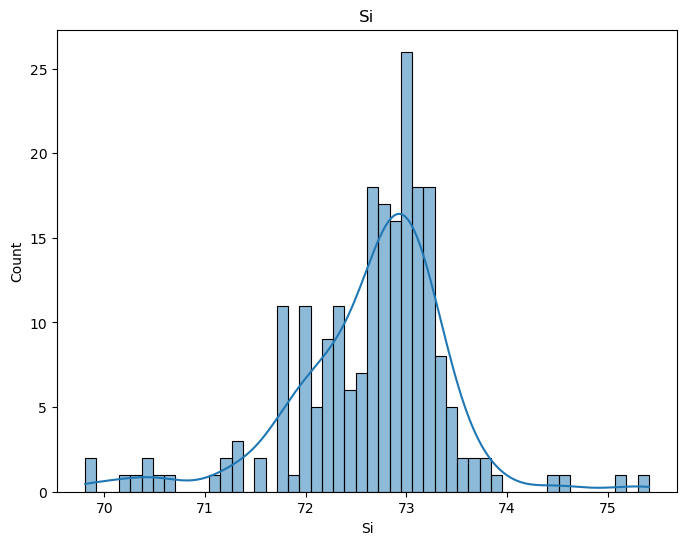

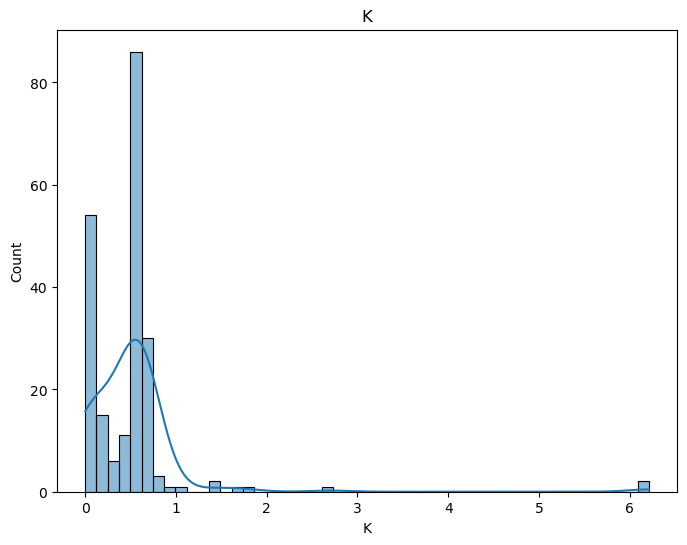

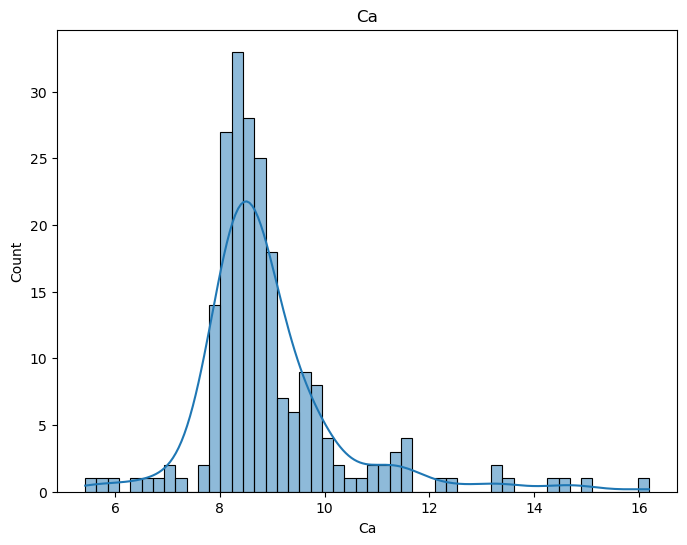

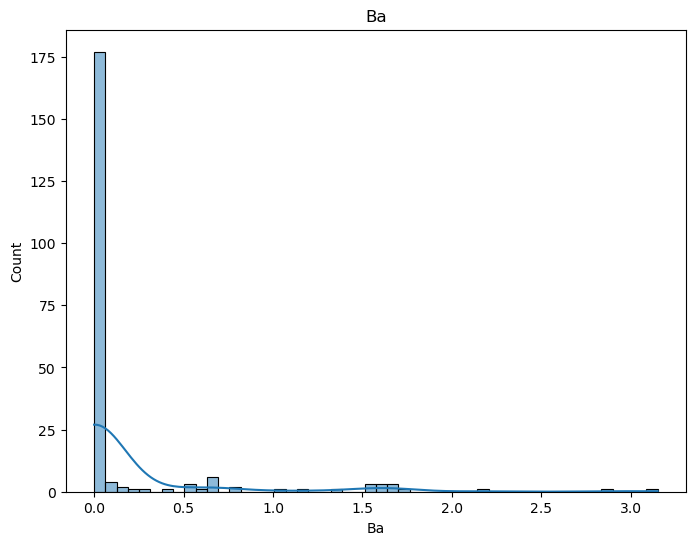

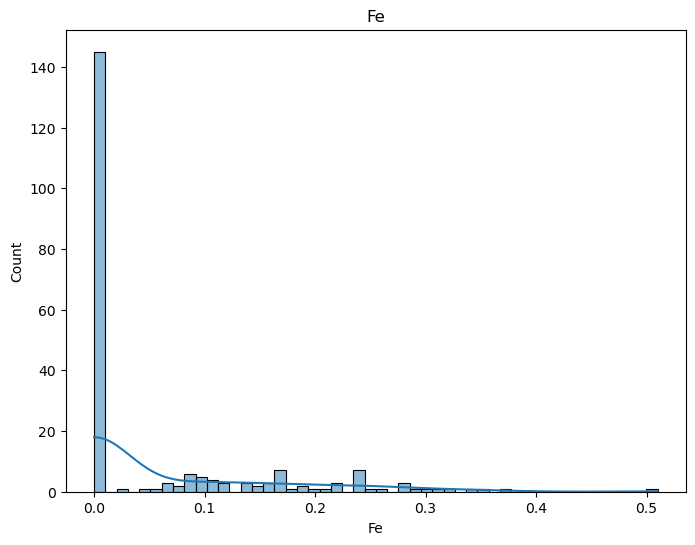

In [33]:
for column in data.drop(columns='Type').columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=50, kde=True)
    plt.title(column)
    plt.show()

Признаки с нормальным растпределением - RI, Na, Mg, Al, Si

In [51]:
# Обучение, предсказываем значения
clf = svm.OneClassSVM(kernel="rbf", nu=0.05)
clf.fit(data.drop(columns='Type'))

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


In [52]:
y_pred_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1])

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

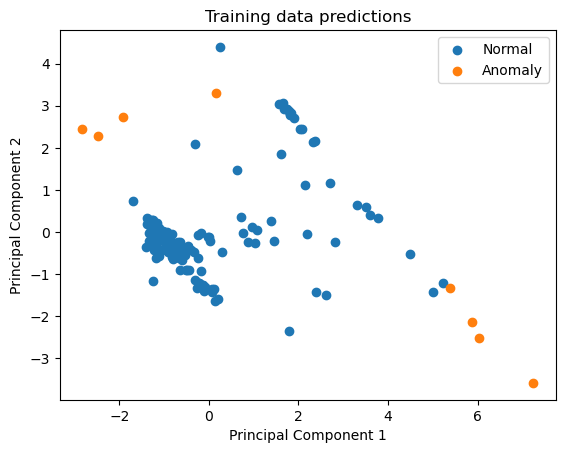

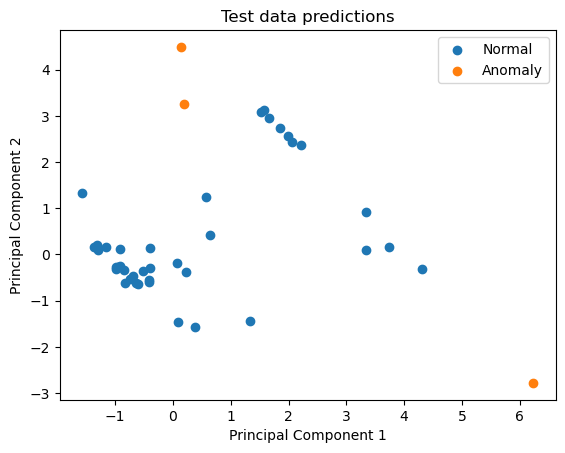

In [54]:
import matplotlib.pyplot as plt

def plot_decision(X, y_pred, title):
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label='Normal')
    plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], label='Anomaly')
    plt.legend()
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Визуализация результатов для тренировочного набора
plot_decision(X_train_pca, y_pred_train, "Training data predictions")

# Визуализация результатов для тестового набора
plot_decision(X_test_pca, y_pred_test, "Test data predictions")


In [80]:
scaled_data = StandardScaler().fit_transform(data.drop(columns='Type'))
dbscan = DBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(scaled_data)
outliers = data[clusters == -1]

In [87]:
outliers.count()/data.count()*100

RI      10.280374
Na      10.280374
Mg      10.280374
Al      10.280374
Si      10.280374
K       10.280374
Ca      10.280374
Ba      10.280374
Fe      10.280374
Type    10.280374
dtype: float64

10.28% данных помечены как выбросы

In [88]:
new_data = data[clusters != -1]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(columns='Type'),
                                                    new_data['Type'],
                                                    test_size=0.2,
                                                    random_state=42)

In [90]:
dt_new = RandomForestClassifier()
dt_new.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
dt.score(X_train, y_train)

0.9673202614379085

In [92]:
dt.score(X_test, y_test)

0.9743589743589743

После удаления выбрасов качество модели увеличилось